### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

•	Any Relationship with Attrition & below factors
o	Region / country in which consultant is working
o	Duration in same project
o	Overtime in the project
o	Cases where there is no Promotion 
o	Tenure of Service
o	Training hour / Internal initiatives
o	Parameter to be linked are – Employee level, Onsite / offshore, Domain / Skill Role, Skill matrix, Location of the consultant, Pillar
o	Future Forecast 


In [1]:
import ads

print(ads.__version__)

2.9.1


In [1]:
import ads
import pandas as pd

ads.set_auth("resource_principal")

In [2]:
!pip install pyxlsb

In [3]:
bucket_name = "HROps"
namespace = "gc35013"


file_name = "AI-ML Data Input for FY22 , FY23 and FY24(Q1Q2) 12Dec2023.xlsb"
df = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
engine = 'pyxlsb')

In [9]:
df.head()

,Fiscal Year,Qtr,Consultant Mail ID,Control,E/C,Level,Manager,Pillar,Capacity Hours,Billable Hours,Domain 1,Domain 1.1,Resource Primary Skill,Secondary Primary Skill
0,FY-22,Q1,a.aasik@oracle.com,FY-22Q1a.aasik@oracle.comC,C,C,jitendra.js.singh@oracle.com,CX Retail,520.0,432.0,App,CX,Global/CX/Technical Consultant,Global-R2/CX/Integration
1,FY-22,Q1,a.abhinav.s.sharma@oracle.com,FY-22Q1a.abhinav.s.sharma@oracle.comE,E,2,nitin.singh@oracle.com,CX Retail,520.0,504.0,App,CX,Global/CX/Technical Consultant,Global-R2/CX/Siebel/Data Migration(EIM)
2,FY-22,Q1,a.ashok.padmanaban@oracle.com,FY-22Q1a.ashok.padmanaban@oracle.comE,E,4,sreenivasa.venkatasubbarao@oracle.com,ERP SCM,280.0,192.0,App,SCM,Global/SCM/Functional Consultant,Global-R2/SCM/Procurement
3,FY-22,Q1,a.c.arun.thyagarajan@oracle.com,FY-22Q1a.c.arun.thyagarajan@oracle.comE,E,5,kishore.ludhani@oracle.com,ERP SCM,136.0,49.0,App,SCM,Global/SCM/Lead,Global-R2/SCM/Procurement
4,FY-22,Q1,a.rama.devi@oracle.com,FY-22Q1a.rama.devi@oracle.comE,E,4,anil.kumar.ragampeta@oracle.com,HCM,520.0,528.0,App,HCM,Global/HCM/Functional Consultant,Global-R2/HCM Cloud/Payroll/Functional


In [4]:
#store data from mutliple sheets to a variable
capacity = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Capacity')
billable = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Billable Days')
non_billable = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'NB Days')
new_joiner = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'New Joiners ')
exit = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'EXIT')
promotion_list = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Promotion List')
location = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Location')
t_d_grad = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'T&D and Grads')
act_emp = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Active Employee and Contractors')
ons_off = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Onsite Offshore details')
monthly_capacity = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Monthly Capacity')
allocation = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Allocation')
consultant = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Consultants in Same project')
utilization = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Ex GSD FY22 Utl Details')
sheet1 = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Sheet1')
sheet2 = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Sheet2')
sheet5 = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Sheet5')

In [16]:
capacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38376 entries, 0 to 38375
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fiscal Year              38376 non-null  object 
 1   Qtr                      38376 non-null  object 
 2   Consultant Mail ID       38376 non-null  object 
 3   Control                  38376 non-null  object 
 4   E/C                      38376 non-null  object 
 5   Level                    38376 non-null  object 
 6   Manager                  38376 non-null  object 
 7   Pillar                   38376 non-null  object 
 8   Capacity Hours           38353 non-null  float64
 9   Billable Hours           38353 non-null  float64
 10  Domain 1                 38376 non-null  object 
 11  Domain 1.1               38376 non-null  object 
 12  Resource Primary Skill   38162 non-null  object 
 13  Secondary Primary Skill  37129 non-null  object 
dtypes: float64(2), object(

### Region in which employee is working

In [28]:
# let's investigate the sheet with region column
location.columns

Index(['Email ID', 'Employee / Contractor', 'Location'], dtype='object')

In [18]:
location.shape

(5954, 3)

In [19]:
location['Consultant Mail ID'].nunique()

5736

In [21]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.9 MB/s eta 0:00:00


In [5]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Location'>

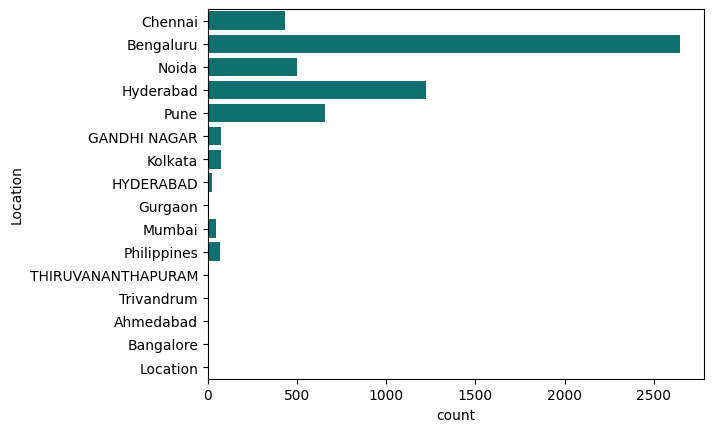

In [27]:
import matplotlib.pyplot as plt
sns.countplot(location, y = 'Location', orient = 'h')
# plt.show()

In [6]:
location['Location'] = location['Location'].replace(['Bangalore'], 'Bengaluru')
location['Location'] = location['Location'].replace(['HYDERABAD'], 'Hyderabad')

<Axes: xlabel='count', ylabel='Location'>

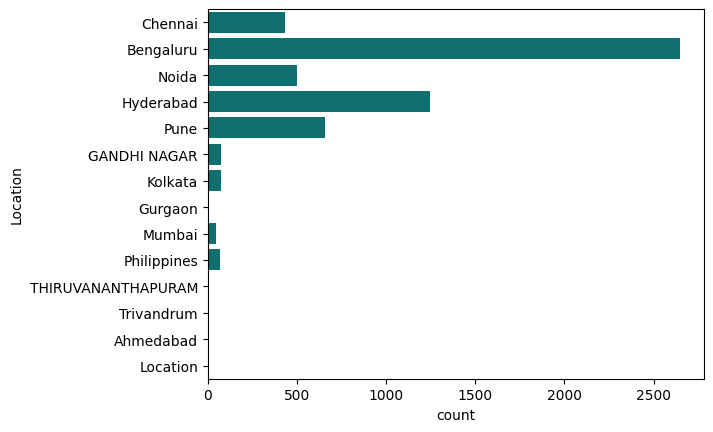

In [29]:
# replotting to see if the location typos have been corrected
sns.countplot(location, y = 'Location', orient = 'h')

### Cases where there is no promotion

In [31]:
promotion_list.head()

,Fiscal Year,Email ID,New Level
0,FY-22,sarat.palli@oracle.com,8
1,FY-22,sneha.mishra@oracle.com,6S
2,FY-22,padmini.shankar.rao@oracle.com,6S
3,FY-22,anand.deshpande@oracle.com,8
4,FY-22,bhanu.revuri@oracle.com,7T


In [7]:
promotion_list['promotion_tag'] = 1

In [8]:
promotion_list['promotion_tag'].value_counts()

promotion_tag
1    717
Name: count, dtype: int64

In [9]:
# merge promotion and location table
location = location.rename(columns={'Consultant Mail ID':'Email ID'})
promotion_with_location = pd.merge(location, promotion_list[['Email ID','promotion_tag']], on = 'Email ID', how = 'left')
promotion_with_location['promotion_tag'].fillna(0, inplace = True)
promotion_with_location['promotion_tag'] = promotion_with_location['promotion_tag'].astype(int)

In [35]:
promotion_with_location['promotion_tag'].value_counts()

promotion_tag
0    5280
1     674
Name: count, dtype: int64

In [36]:
promotion_with_location

,Email ID,Employee / Contractor,Location,promotion_tag
0,a.aasik@oracle.com,C,Chennai,0
1,a.abhinav.s.sharma@oracle.com,E,Bengaluru,0
2,a.abhishek.tiwari@oracle.com,C,Noida,0
3,a.anurag.kumar@oracle.com,E,Hyderabad,0
4,a.ashish.agarwal@oracle.com,E,Pune,0
...,...,...,...,...
5949,vijay.kumar.velpula@oracle.com,E,NaN,0
5950,vikas.andugula@oracle.com,E,NaN,0
5951,vinod.kumar.ponde.gopal.rao@oracle.com,C,NaN,0
5952,vishakha.m.modi@oracle.com,C,NaN,0


In [10]:
promotion_with_location['Location'] = promotion_with_location['Location'].fillna('nil')

In [44]:
promotion_with_location.isnull().sum()

Email ID                 3
Employee / Contractor    4
Location                 0
promotion_tag            0
dtype: int64

### Tenure of Service

In [11]:
# reformatting the date columns since it is interprested as integers
exit['Hire Date'] = pd.to_datetime(exit['Hire Date'], unit='D', origin='1899-12-30')
exit['Separation Date'] = pd.to_datetime(exit['Separation Date'], unit = 'D', origin = '1899-12-30')
from datetime import timedelta
exit['diff_in_days'] = exit['Separation Date'] - exit['Hire Date']
exit['diff_in_years'] = exit["diff_in_days"] / timedelta(days=365)

In [17]:
exit.shape

(1855, 14)

In [18]:
exit.columns

Index(['Fiscal Year', 'Quarter', 'Employee / Contractor', 'Employee Number',
       'Email Address', 'Hire Date', 'Separation Date', 'Check', 'Job Name',
       'Level', 'CC', 'Pillar', 'diff_in_days', 'diff_in_years'],
      dtype='object')

In [12]:
new_joiner.head()

,Fiscal Year,Quarter,Employee / Contractor,Employee Number,Email Address,Hire Date,Job Name,Level,CC,Pillar
0,FY-22,Q4,E,1577352,manoj.v.bagul@oracle.com,44707,20610.Senior Principal Consultant.IC3,6S,504736,ERP SCM
1,FY-22,Q4,E,1569826,vishal.deep@oracle.com,44707,20410.Senior Consultant.IC2,4,504636,CX Retail
2,FY-22,Q4,E,1615589,dharsana.george@oracle.com,44707,20310.Staff Consultant.IC1,3,504636,CX Retail
3,FY-22,Q4,E,1624093,riaz.haneef.mohammed@oracle.com,44707,20515.Principal Consultant.IC3,5,504776,HCM
4,FY-22,Q4,E,1610427,sridhar.s.kanaparthi@oracle.com,44707,20515.Principal Consultant.IC3,5,504826,Tech Cloud


In [13]:
new_joiner.shape

(3424, 10)

In [14]:
new_joiner['Hire Date'] = pd.to_datetime(new_joiner['Hire Date'], origin = '1899-12-30', unit = 'D')

In [15]:
new_joiner.head()

,Fiscal Year,Quarter,Employee / Contractor,Employee Number,Email Address,Hire Date,Job Name,Level,CC,Pillar
0,FY-22,Q4,E,1577352,manoj.v.bagul@oracle.com,2022-05-26,20610.Senior Principal Consultant.IC3,6S,504736,ERP SCM
1,FY-22,Q4,E,1569826,vishal.deep@oracle.com,2022-05-26,20410.Senior Consultant.IC2,4,504636,CX Retail
2,FY-22,Q4,E,1615589,dharsana.george@oracle.com,2022-05-26,20310.Staff Consultant.IC1,3,504636,CX Retail
3,FY-22,Q4,E,1624093,riaz.haneef.mohammed@oracle.com,2022-05-26,20515.Principal Consultant.IC3,5,504776,HCM
4,FY-22,Q4,E,1610427,sridhar.s.kanaparthi@oracle.com,2022-05-26,20515.Principal Consultant.IC3,5,504826,Tech Cloud


In [16]:
new_joiner['Employee Number'].nunique()

3399

In [23]:
tenure_of_service_table = pd.merge(exit[['Employee Number','Email Address','diff_in_years','Hire Date','Separation Date']],new_joiner[['Employee Number','Email Address','Hire Date']], on = 'Employee Number', how = 'inner')

In [24]:
tenure_of_service_table.head()

,Employee Number,Email Address_x,diff_in_years,Hire Date_x,Separation Date,Email Address_y,Hire Date_y
0,1457309,pratibha.b@oracle.com,1.005479,2021-06-14,2022-06-16,pratibha.b@oracle.com,2021-06-14
1,1499840,deepak.b.balaganapathi@oracle.com,0.660274,2021-10-25,2022-06-23,deepak.b.balaganapathi@oracle.com,2021-10-25
2,1542763,abhishek.nahar@oracle.com,0.356164,2022-02-14,2022-06-24,abhishek.nahar@oracle.com,2022-02-14
3,1451774,saurabh.sm.mehta@oracle.com,1.087671,2021-05-27,2022-06-28,saurabh.sm.mehta@oracle.com,2021-05-27
4,1514529,sufal.gupta@oracle.com,0.745205,2021-09-30,2022-06-29,sufal.gupta@oracle.com,2021-09-30


In [25]:
tenure_of_service_table.shape

(757, 7)

In [26]:
tenure_of_service_table.isnull().sum()

Employee Number    0
Email Address_x    0
diff_in_years      0
Hire Date_x        0
Separation Date    0
Email Address_y    0
Hire Date_y        0
dtype: int64

##### This table becomes obsolete because we don't have to join the exit and new joiners table since the study is performed only on those who have left the company

In [27]:
exit.head()

,Fiscal Year,Quarter,Employee / Contractor,Employee Number,Email Address,Hire Date,Separation Date,Check,Job Name,Level,CC,Pillar,diff_in_days,diff_in_years
0,FY-23,Q1,E,1147685,swapna.yenugula@oracle.com,2019-10-10,2022-06-08,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504716,ERP FIN,972 days,2.663014
1,FY-23,Q1,E,734489,sumita.x.sanyal@oracle.com,2019-10-24,2022-06-09,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504776,HCM,959 days,2.627397
2,FY-23,Q1,E,894311,ravi.chandan.reddy@oracle.com,2016-06-09,2022-06-09,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504776,HCM,2191 days,6.002740
3,FY-23,Q1,E,1072381,vinothkannan.lakshmanan@oracle.com,2018-12-03,2022-06-10,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,501185,ERP FIN,1285 days,3.520548
4,FY-23,Q1,E,1138808,milind.d.joshi@oracle.com,2019-09-23,2022-06-10,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504686,EPM,991 days,2.715068


### Location  + Promotion + Exit

In [29]:
promotion_with_location.head()

,Email ID,Employee / Contractor,Location,promotion_tag
0,a.aasik@oracle.com,C,Chennai,0
1,a.abhinav.s.sharma@oracle.com,E,Bengaluru,0
2,a.abhishek.tiwari@oracle.com,C,Noida,0
3,a.anurag.kumar@oracle.com,E,Hyderabad,0
4,a.ashish.agarwal@oracle.com,E,Pune,0


In [32]:
exit.rename(columns = {'diff_in_years' : 'tenureofservice'}, inplace = True)

In [34]:
exit.head()

,Fiscal Year,Quarter,Employee / Contractor,Employee Number,Email Address,Hire Date,Separation Date,Check,Job Name,Level,CC,Pillar,diff_in_days,tenureofservice
0,FY-23,Q1,E,1147685,swapna.yenugula@oracle.com,2019-10-10,2022-06-08,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504716,ERP FIN,972 days,2.663014
1,FY-23,Q1,E,734489,sumita.x.sanyal@oracle.com,2019-10-24,2022-06-09,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504776,HCM,959 days,2.627397
2,FY-23,Q1,E,894311,ravi.chandan.reddy@oracle.com,2016-06-09,2022-06-09,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504776,HCM,2191 days,6.002740
3,FY-23,Q1,E,1072381,vinothkannan.lakshmanan@oracle.com,2018-12-03,2022-06-10,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,501185,ERP FIN,1285 days,3.520548
4,FY-23,Q1,E,1138808,milind.d.joshi@oracle.com,2019-09-23,2022-06-10,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504686,EPM,991 days,2.715068


In [35]:
promotion_with_location.rename(columns = {'Email ID': 'Email Address'}, inplace = True)

In [37]:
# context of studying if there is a relation of exit with location and promotion
promo_loc_exit = pd.merge(exit, promotion_with_location[['Email Address','promotion_tag','Location']], on = 'Email Address', how = 'inner')

In [39]:
promo_loc_exit.columns

Index(['Fiscal Year', 'Quarter', 'Employee / Contractor', 'Employee Number',
       'Email Address', 'Hire Date', 'Separation Date', 'Check', 'Job Name',
       'Level', 'CC', 'Pillar', 'diff_in_days', 'tenureofservice',
       'promotion_tag', 'Location'],
      dtype='object')

In [41]:
promo_loc_exit.isnull().sum()

Fiscal Year                0
Quarter                    0
Employee / Contractor      0
Employee Number            0
Email Address              0
Hire Date                  0
Separation Date            0
Check                    528
Job Name                   0
Level                      0
CC                         0
Pillar                     0
diff_in_days               0
tenureofservice            0
promotion_tag              0
Location                   0
dtype: int64

<Axes: xlabel='count', ylabel='Pillar'>

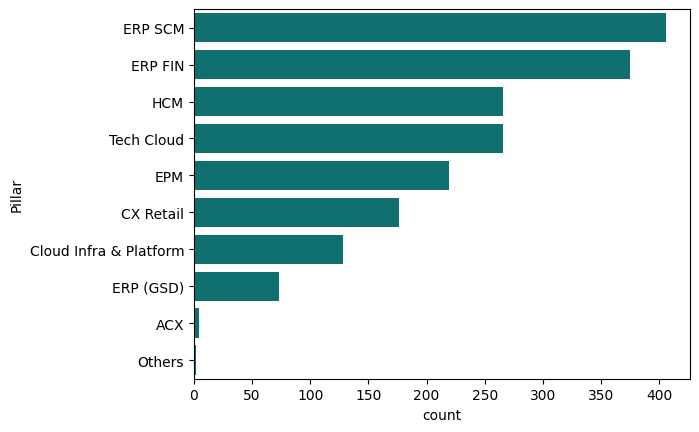

In [55]:
sns.countplot(promo_loc_exit, y = 'Pillar', orient = 'h', order = promo_loc_exit['Pillar'].value_counts().index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Bengaluru'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'GANDHI NAGAR'),
  Text(3, 0, 'Gurgaon'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Kolkata'),
  Text(6, 0, 'Mumbai'),
  Text(7, 0, 'Noida'),
  Text(8, 0, 'Philippines'),
  Text(9, 0, 'Pune'),
  Text(10, 0, 'nil')])

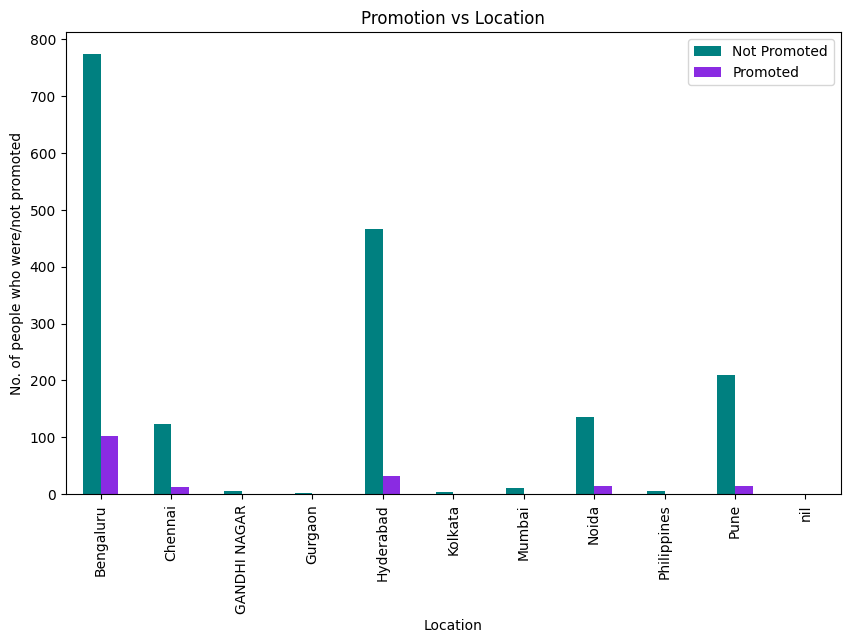

In [48]:
import matplotlib.pyplot as plt
#create a plot for cross tab
pd.crosstab(promo_loc_exit['Location'],promo_loc_exit['promotion_tag']).plot(kind="bar", figsize=(10,6))
plt.title("Promotion vs Location")
plt.xlabel("Location")
plt.ylabel("No. of people who were/not promoted")
plt.legend(["Not Promoted","Promoted"])
plt.xticks(rotation=90)

In [57]:
# Group by 'Pillar' and calculate the mean 'Tenure_of_Service' for each group
average_tenure = promo_loc_exit.groupby('Pillar')['tenureofservice'].mean().reset_index()

# Rename columns for clarity
average_tenure.columns = ['Pillar', 'Average_Tenure_of_Service']

# Display the result
print(average_tenure.sort_values(by = 'Average_Tenure_of_Service',ascending = True))

                   Pillar  Average_Tenure_of_Service
3                     EPM                   1.537399
0                     ACX                   1.561644
4               ERP (GSD)                   1.866166
9              Tech Cloud                   2.146338
6                 ERP SCM                   2.178109
5                 ERP FIN                   2.312979
2  Cloud Infra & Platform                   2.427419
7                     HCM                   2.790895
1               CX Retail                   2.826027
8                  Others                   5.402740


### Chi-Square test to study the relationship between categorical variables (for ex: status of stay/left vs promotion vs location vs region

In [58]:
promo_loc_exit.shape

(1915, 16)

In [59]:
promo_loc_exit.head()

,Fiscal Year,Quarter,Employee / Contractor,Employee Number,Email Address,Hire Date,Separation Date,Check,Job Name,Level,CC,Pillar,diff_in_days,tenureofservice,promotion_tag,Location
0,FY-23,Q1,E,1147685,swapna.yenugula@oracle.com,2019-10-10,2022-06-08,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504716,ERP FIN,972 days,2.663014,1,Bengaluru
1,FY-23,Q1,E,734489,sumita.x.sanyal@oracle.com,2019-10-24,2022-06-09,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504776,HCM,959 days,2.627397,0,Pune
2,FY-23,Q1,E,894311,ravi.chandan.reddy@oracle.com,2016-06-09,2022-06-09,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504776,HCM,2191 days,6.002740,1,Hyderabad
3,FY-23,Q1,E,1072381,vinothkannan.lakshmanan@oracle.com,2018-12-03,2022-06-10,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,501185,ERP FIN,1285 days,3.520548,1,Chennai
4,FY-23,Q1,E,1138808,milind.d.joshi@oracle.com,2019-09-23,2022-06-10,20515,20515.Principal Consultant.CONS.IMPDEL.IC3,5,504686,EPM,991 days,2.715068,0,Pune


In [60]:
promo_loc_exit.to_csv(r'promo_loc_exit.to_csv')